For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

  ### Has the network latency gone up since we switched internet service providers?

- value: latency
- condition: latency before change, latency after change

  h0 = There is no difference between the latency in internet from the old to the new service
  
  ha = There is a diff between the latecy of internet now than the latency from before we switched
  


  * True Positive ==> There was a diff in latency and the diff in lat was indeed true
  * True Negative ==> No diff in latency and there was in fact no diff in latency / did not reject h0 and h0 was true
  * type I ==> there was a diff in lat, but there was no diff in latency
  * type II ==> there was no diff in latency but there was a diff



### Is the website redesign any good?

- engagement score for traffic to website

h0 = No diff in engagement from the old design to the new design

ha = There is a measurable increase in engagement since the redesign

* True Positive ==> There was an increase since the redesign so we rejected the null 
* True Negative ==> No change or less engagement and it did not increase
* type I ==> Said there was an increase but there wasnt
* type II ==> engagement was the same or less than before but it actually increased


### Is our television ad driving more sales?

h0 = new_sales no diff or less than old_sales before ad

ha = new_sales > it was before running the add

* True Positive ==> sales avg has increased, and we said that it increased
* True Negative ==> there was no change or less and that was actually the case
* type I ==> sales were greater now but we said the did not change or were less
* type II ==> said that sales were the same or less than they were before, but are actually increased now since the ad


1. Answer with the type of stats test you would use (assume normal distribution):

    

* Is there a relationship between the length of your arm and the length of your foot?
    

In [1]:
# use pearsonr

* Does smoking affect when or not someone has lung cancer?
    

In [2]:
# 

* Is gender independent of a person’s blood type?
    

* Does whether or not a person has a cat or dog affect whether they live in an apartment?
    

* Does the length of time of the lecture correlate with a student's grade?



2. Use the telco_churn data.

    * Does tenure correlate with monthly charges?
    * Total charges?
    * What happens if you control for phone and internet service?



In [3]:
import env
import pandas as pd
import numpy as np
from sqlalchemy import text, create_engine
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
db = 'telco_churn'
engine = create_engine(env.get_db_url(db))
query = text('select * from customers')
tco_df = pd.read_sql(query, engine.connect())
tco_df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [5]:
# Does tenure correlate with monthly charges
ten_cust = tco_df[['tenure', 'monthly_charges']]

In [6]:
ten_cust

,tenure,monthly_charges
0,9,65.60
1,9,59.90
2,4,73.90
3,13,98.00
4,3,83.90
...,...,...
7038,13,55.15
7039,22,85.10
7040,2,50.30
7041,67,67.85


In [7]:
x = ten_cust.tenure
y = ten_cust.monthly_charges
alpha = 0.05
# h0

In [8]:
r, p = stats.pearsonr(x, y)

In [9]:
r

0.24789985628615246

In [10]:
p

4.094044991476844e-99

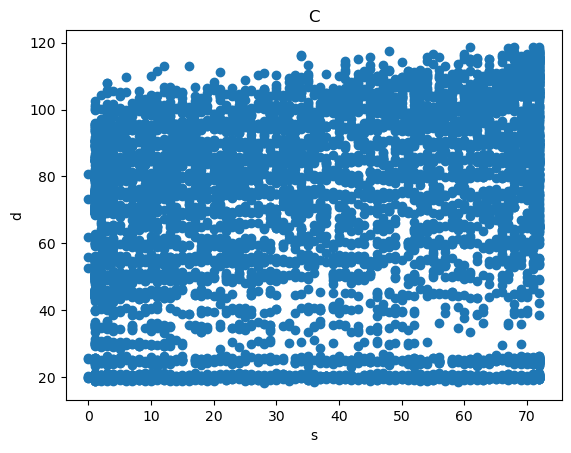

In [11]:
plt.scatter(ten_cust.tenure, ten_cust.monthly_charges)
plt.title('C')
plt.xlabel('s')
plt.ylabel('d')
plt.show()

In [12]:
# no correlation

In [15]:
tco_df['total_charges']

0         593.3
1         542.4
2        280.85
3       1237.85
4         267.4
         ...   
7038      742.9
7039     1873.7
7040      92.75
7041    4627.65
7042     3707.6
Name: total_charges, Length: 7043, dtype: object

In [23]:
tco_df['total_charges'] = pd.to_numeric(tco_df['total_charges'], errors='coerce')

In [34]:
tco_df.tenure.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: tenure
Non-Null Count  Dtype
--------------  -----
7043 non-null   int64
dtypes: int64(1)
memory usage: 55.2 KB


In [36]:
tco_df['total_charges'].dropna()

0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7038     742.90
7039    1873.70
7040      92.75
7041    4627.65
7042    3707.60
Name: total_charges, Length: 7032, dtype: float64

In [37]:
ten_total = tco_df[['tenure', 'total_charges']]



In [41]:
len(ten_total)

7032

In [42]:
x = ten_total.tenure
y = ten_total.total_charges

In [43]:
r, p = stats.pearsonr(x, y)

In [44]:
r

0.8258804609332071

In [45]:
p

0.0

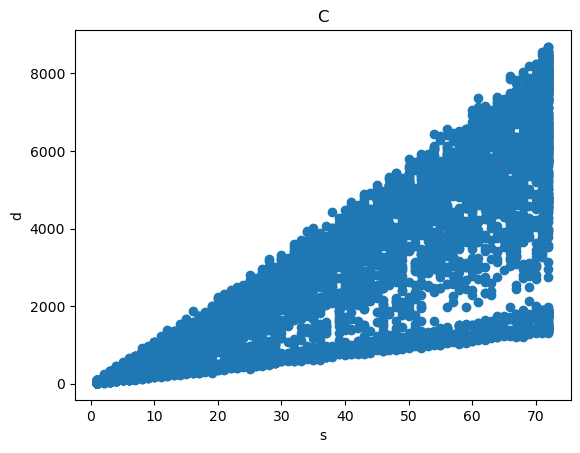

In [46]:
plt.scatter(ten_total.tenure, ten_total.total_charges)
plt.title('C')
plt.xlabel('s')
plt.ylabel('d')
plt.show()

3. Use the employees database.

    * Is there a relationship between how long an employee has been with the company and their salary?
    * Is there a relationship between how long an employee has been with the company and the number of titles they have had?



In [89]:
from datetime import date
now = date.today()
now

datetime.date(2023, 8, 7)

In [47]:
db = 'employees'
engine = create_engine(env.get_db_url(db))
query = text('select * from employees join salaries using (emp_no) join titles using (emp_no) where salaries.to_date > now() and titles.to_date > now()')
emp_df = pd.read_sql(query, engine.connect())
emp_df

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Senior Engineer,1995-12-01,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01,Senior Staff,1996-09-12,9999-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,52868,2002-06-01,9999-01-01,Engineer,1997-06-02,9999-01-01
240120,499996,1953-03-07,Zito,Baaz,M,1990-09-27,69501,2002-05-12,9999-01-01,Senior Engineer,2002-05-13,9999-01-01
240121,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,83441,2001-08-26,9999-01-01,Senior Engineer,1992-08-29,9999-01-01
240122,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01,Senior Staff,1998-12-27,9999-01-01


In [108]:
emp_df['emp_tenure'] = now - emp_df.hire_date
emp_df['emp_tenure'] = emp_df['emp_tenure'].astype(str)
emp_df['emp_tenure'] = emp_df['emp_tenure'].str.replace(' days, 0:00:00', '')
emp_df['emp_tenure'] = emp_df['emp_tenure'].astype(float)
emp_df

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,title,from_date,to_date,emp_tenure
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,Senior Engineer,1986-06-26,9999-01-01,13556.0
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,Staff,1996-08-03,9999-01-01,13773.0
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,Senior Engineer,1995-12-03,9999-01-01,13493.0
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Senior Engineer,1995-12-01,9999-01-01,13398.0
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01,Senior Staff,1996-09-12,9999-01-01,12382.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,52868,2002-06-01,9999-01-01,Engineer,1997-06-02,9999-01-01,11164.0
240120,499996,1953-03-07,Zito,Baaz,M,1990-09-27,69501,2002-05-12,9999-01-01,Senior Engineer,2002-05-13,9999-01-01,12002.0
240121,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,83441,2001-08-26,9999-01-01,Senior Engineer,1992-08-29,9999-01-01,13622.0
240122,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01,Senior Staff,1998-12-27,9999-01-01,10890.0


In [109]:
emp_sal = emp_df[['emp_tenure', 'salary']]

In [111]:
x = emp_sal.emp_tenure
y = emp_sal.salary.astype(float)

In [113]:
r, p = stats.pearsonr(x, y)

In [114]:
r

0.3064625613186014

In [115]:
p

0.0

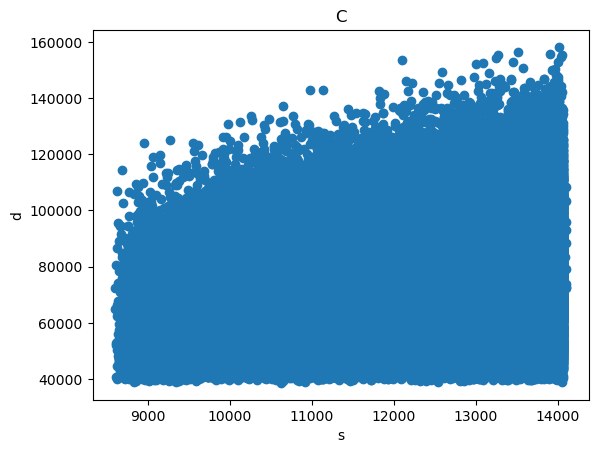

In [116]:
plt.scatter(emp_sal.emp_tenure, emp_sal.salary)
plt.title('C')
plt.xlabel('s')
plt.ylabel('d')
plt.show()

4. Use the sleepstudy data.
    * Is there a relationship between days and reaction time?

In [53]:
from pydataset import data


In [62]:
sleep_df = data('sleepstudy')
sleep_df

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


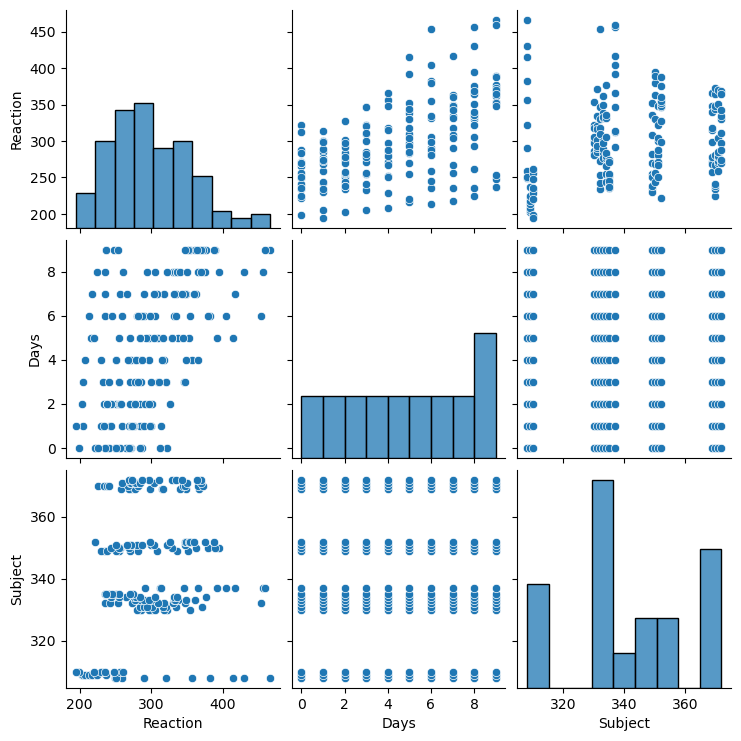

In [63]:
sns.pairplot(sleep_df)